Tolulope Olatunbosun Data Science Assignment #2: Titanic 

#### Step 1 (0 points) - Setup Data

#### Step 2 (1 Point) -  Get Data

#### Step 3 (1 Point) - Data Manipulation and Analysis Using Pandas

#### Step 4 (2 Points) - (Visualization between (Survived, P-class) and the third class - Age)

#### Step 5 (2 Points): Preprocessing for ML Algos
 
#### Step 6 (2 Points): Selecting and Training

#### Step 7 (2 Points):  (goal is to get over 70% accuracy) -  Final Test/Tune your model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
ytest = pd.read_csv("gender_submission.csv")

In [3]:
ytest.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [4]:
ytest.shape

(418, 2)

In [5]:
ytest.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [6]:
ytest.corr()

,PassengerId,Survived
PassengerId,1.000000,-0.023245
Survived,-0.023245,1.000000


### Check for any null values within the data set.

In [7]:
ytest.isnull()

,PassengerId,Survived
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
413,False,False
414,False,False
415,False,False
416,False,False


In [8]:
print("The total number of labels is: {}".format(ytest.shape[0]))

The total number of labels is: 418


In [9]:
X_train = pd.read_csv("train.csv")

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

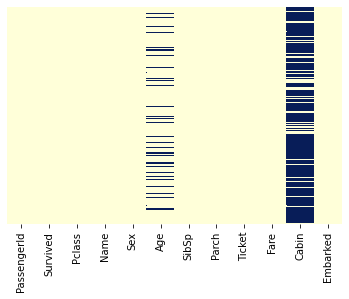

In [12]:
sns.heatmap(X_train.isnull(), yticklabels = False, cbar = False, cmap = "YlGnBu")
# cbar is false as I'm not changing any colors
# heatmap of true and false statements
# each blue dash represents the nulls in Age 
# Missing lots of Cabin information, some Age information

<AxesSubplot:xlabel='Survived', ylabel='count'>

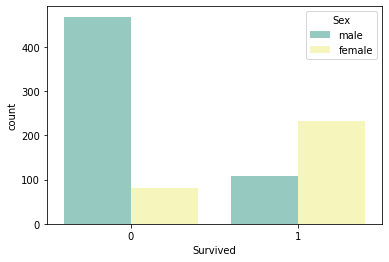

In [13]:
sns.countplot(x='Survived', hue = 'Sex', data = X_train, palette='Set3')

A comparison of the survivors data. Here I find that that among those who survived, the majority of them were women, and among those who didn't the majority were male.

<AxesSubplot:xlabel='Survived', ylabel='count'>

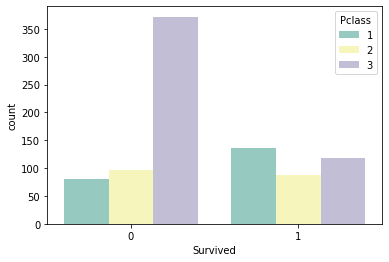

In [14]:
sns.countplot(x='Survived', hue = 'Pclass', data = X_train, palette='Set3')

Among those who didn't survive, many were of the 3rd passenger class.

In [15]:
sex = pd.get_dummies(X_train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [16]:
emb = pd.get_dummies(X_train['Embarked'], drop_first = True)
emb.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [17]:
train = pd.concat([X_train, sex, emb], axis = 1)
train.head()
# pass in list of desired dataframes
# axis = 1 because I want them to be added as new columns
# Embarked column became Q and S
# Sex column became Male column: 1 for male, 0 for female

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [18]:
X_train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [19]:
X_train.drop('PassengerId', axis = 1, inplace = True)

In [20]:
X_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,0,3,22.0,1,0,7.2500,NaN
1,1,1,38.0,1,0,71.2833,C85
2,1,3,26.0,0,0,7.9250,NaN
3,1,1,35.0,1,0,53.1000,C123
4,0,3,35.0,0,0,8.0500,NaN


Data is finally numerical, and capable of being used in the machine learning algorithm.

In [21]:
y_train = X_train['Survived']
X = X_train.drop('Survived', axis = 1)

In [23]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [24]:
xtest = pd.read_csv("test.csv")
xtest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression()

In [28]:
logmodel.fit(X_train, y_train)

ValueError: could not convert string to float: 'C85'

Although I didn't get past this error, this is what I would have done. I will likely just see you in your office hour to ask what I could have done here.

In [29]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, predictions)